Import Packages

In [112]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value
import matplotlib.pyplot as plt
import networkx as nx


Define data for all 3 scenarios, for order of tasks , and labels for tasks

In [113]:
activitiesBest = {
    'A': 4.25,
    'B': 6.8,
    'C': 5.1,
    'D': 0,
    'D1': 6.8,
    'D2': 6.8,
    'D3': 6.8,
    'D4': 40.8,
    'D5': 6.8,
    'D6': 13.6,
    'D7': 13.6,
    'D8': 6.8,
    'E': 20.4,
    'F': 10.2,
    'G': 13.6,
    'H': 6.8
}
activitiesExpected = {
    'A': 5,
    'B': 8,
    'C': 6,
    'D': 0,
    'D1': 8,
    'D2': 8,
    'D3': 8,
    'D4': 48,
    'D5': 8,
    'D6': 16,
    'D7': 16,
    'D8': 8,
    'E': 24,
    'F': 12,
    'G': 16,
    'H': 8
}
activitiesWorst = {
    'A': 5.75,
    'B': 9.2,
    'C': 6.9,
    'D': 0,
    'D1': 9.2,
    'D2': 9.2,
    'D3': 9.2,
    'D4': 55.2,
    'D5': 9.2,
    'D6': 18.4,
    'D7': 18.4,
    'D8': 9.2,
    'E': 27.6,
    'F': 13.8,
    'G': 18.4,
    'H': 9.2
}
precedences = {
    'A': [],
    'B': [],
    'C': ['A'],
    'D': [],
    'D1': ['A'],
    'D2': ['D1'],
    'D3': ['D1'],
    'D4': ['D2', 'D3'],
    'D5': ['D4'],
    'D6': ['D4'],
    'D7': ['D6'],
    'D8': ['D5', 'D7'],
    'E': ['B', 'C'],
    'F': ['D8', 'E'],
    'G': ['A', 'D8'],
    'H': ['F', 'G']
}

TaskLabels = {
    'A': 'Describe product',
    'B': 'Develop marketing strategy',
    'C': 'Design brochure',
    'D': 'Develop product prototype',
    'D1': 'Requirements analysis',
    'D2': 'Software design',
    'D3': 'System design',
    'D4': 'Coding',
    'D5': 'Write documentation',
    'D6': 'Unit testing',
    'D7': 'System testing',
    'D8': 'Package deliverables',
    'E': 'Survey potential market',
    'F': 'Develop pricing plan',
    'G': 'Develop implementation plan',
    'H': 'Write client proposal'
}

Best case scenario


In [114]:
activities = activitiesBest 

In [120]:
# Create a list of the activities
activities_list = list(activities.keys())

# Create the LP problem
prob = LpProblem("Critical Path", LpMinimize)

# Create the LP variables
start_times = {activity: LpVariable(f"start_{activity}", 0, None) for activity in activities_list}
end_times = {activity: LpVariable(f"end_{activity}", 0, None) for activity in activities_list}

# Add the constraints
for activity in activities_list:
    prob += end_times[activity] == start_times[activity] + activities[activity], f"{activity}_duration"
    for predecessor in precedences[activity]:
        prob += start_times[activity] >= end_times[predecessor], f"{activity}_predecessor_{predecessor}"

# Set the objective function
prob += lpSum([end_times[activity] for activity in activities_list]), "minimize_end_times"

# Solve the LP problem
status = prob.solve()

# Print the results
print("Critical Path time:")
for activity in activities_list:
    if value(start_times[activity]) == 0:
        print(f"{activity} starts at time 0")
    if value(end_times[activity]) == max([value(end_times[activity]) for activity in activities_list]):
        print(f"{activity} ends at {value(end_times[activity])} hours in duration")

# Create a list to store the variable names and their values
solution_data = []

# Print solution and populate the list
# print("\nSolution variable values:")
for var in prob.variables():
    if var.name != "_dummy":
        # print(var.name, "=", var.varValue)
        solution_data.append({'Variable': var.name, 'Value': var.varValue})

# Convert the list to a DataFrame
Best_case_solution_df = pd.DataFrame(solution_data)

# Print the DataFrame
print("\Best Case DataFrame:")
print(Best_case_solution_df)

Critical Path time:
A starts at time 0
B starts at time 0
D starts at time 0
H ends at 113.05 days in duration
\Best Case DataFrame:
    Variable   Value
0      end_A    4.25
1      end_B    6.80
2      end_C    9.35
3      end_D    0.00
4     end_D1   11.05
5     end_D2   17.85
6     end_D3   17.85
7     end_D4   58.65
8     end_D5   65.45
9     end_D6   72.25
10    end_D7   85.85
11    end_D8   92.65
12     end_E   29.75
13     end_F  102.85
14     end_G  106.25
15     end_H  113.05
16   start_A    0.00
17   start_B    0.00
18   start_C    4.25
19   start_D    0.00
20  start_D1    4.25
21  start_D2   11.05
22  start_D3   11.05
23  start_D4   17.85
24  start_D5   58.65
25  start_D6   58.65
26  start_D7   72.25
27  start_D8   85.85
28   start_E    9.35
29   start_F   92.65
30   start_G   92.65
31   start_H  106.25


C:\Users\hagraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pulp\pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


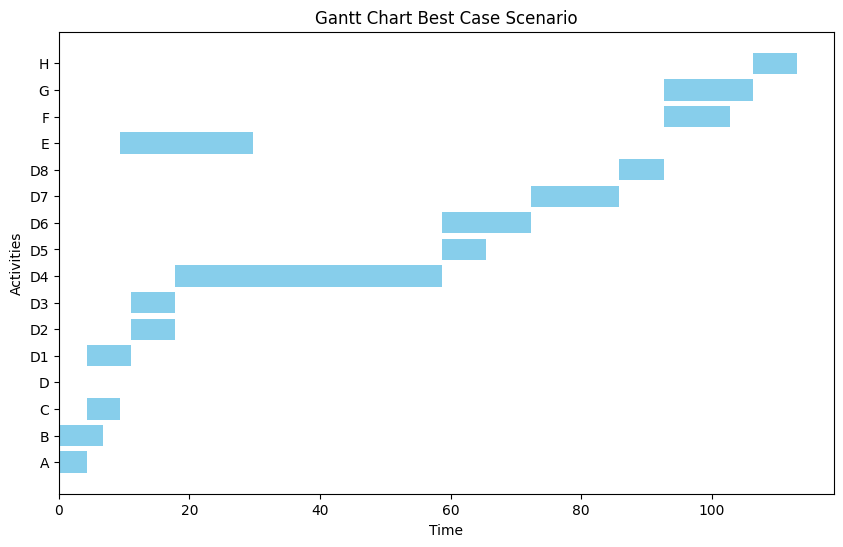

In [87]:
# Extract start and end times
start_times_values = {activity: value(start_times[activity]) for activity in activities_list}
end_times_values = {activity: value(end_times[activity]) for activity in activities_list}

# Calculate durations
durations = {activity: end_times_values[activity] - start_times_values[activity] for activity in activities_list}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, activity in enumerate(activities_list):
    ax.barh(activity, durations[activity], left=start_times_values[activity], color='skyblue')

ax.set_xlabel('Time')
ax.set_ylabel('Activities')
ax.set_title('Gantt Chart Best Case Scenario')
plt.show()

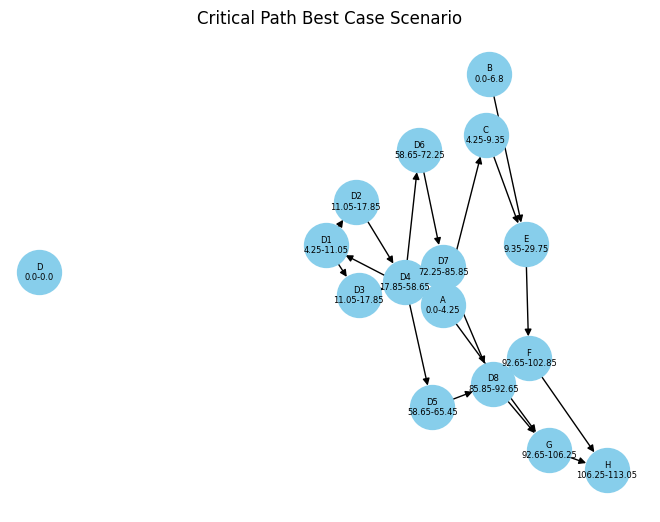

In [89]:
CPGraph = nx.DiGraph()

# Add nodes with start and end times as attributes
for activity in activities_list:
    CPGraph.add_node(activity, start=start_times_values[activity], end=end_times_values[activity])

# Add edges based on precedences
for activity, predecessors in precedences.items():
    for predecessor in predecessors:
        CPGraph.add_edge(predecessor, activity)

# Draw the graph
pos = nx.spring_layout(CPGraph)
nx.draw(CPGraph, pos, with_labels=False, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold')
node_labels = {node: f"{node}\n{start_times_values[node]}-{end_times_values[node]}" for node in CPGraph.nodes()}
plt.title('Critical Path Best Case Scenario')
nx.draw_networkx_labels(CPGraph, pos, labels=node_labels, font_size=6)
plt.show()

Scenario 2: Expected Scenario

Critical Path time:
A starts at time 0
B starts at time 0
D starts at time 0
H ends at 133.0 days in duration
\ActivitiesExpected DataFrame:
    Variable  Value
0      end_A    5.0
1      end_B    8.0
2      end_C   11.0
3      end_D    0.0
4     end_D1   13.0
5     end_D2   21.0
6     end_D3   21.0
7     end_D4   69.0
8     end_D5   77.0
9     end_D6   85.0
10    end_D7  101.0
11    end_D8  109.0
12     end_E   35.0
13     end_F  121.0
14     end_G  125.0
15     end_H  133.0
16   start_A    0.0
17   start_B    0.0
18   start_C    5.0
19   start_D    0.0
20  start_D1    5.0
21  start_D2   13.0
22  start_D3   13.0
23  start_D4   21.0
24  start_D5   69.0
25  start_D6   69.0
26  start_D7   85.0
27  start_D8  101.0
28   start_E   11.0
29   start_F  109.0
30   start_G  109.0
31   start_H  125.0


C:\Users\hagraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pulp\pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


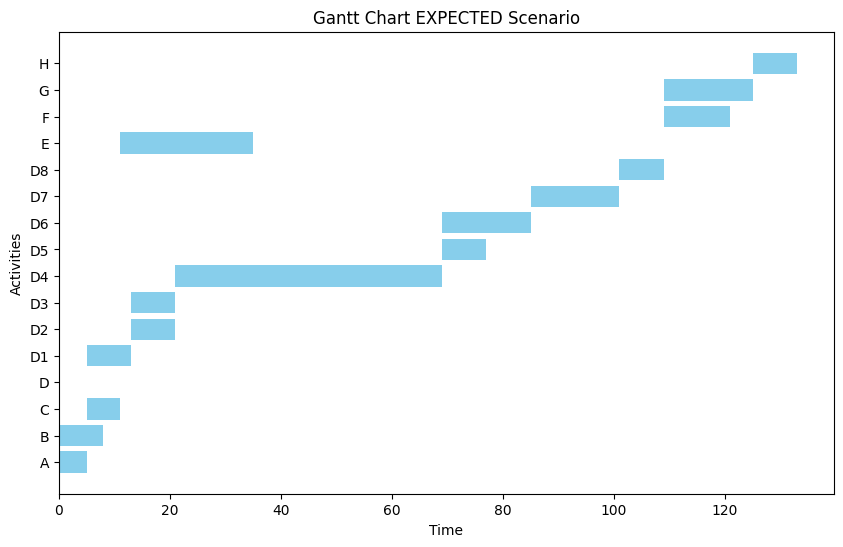

In [121]:
activities = activitiesExpected 
# Create a list of the activities
activities_list = list(activities.keys())

# Create the LP problem
prob = LpProblem("Critical Path", LpMinimize)

# Create the LP variables
start_times = {activity: LpVariable(f"start_{activity}", 0, None) for activity in activities_list}
end_times = {activity: LpVariable(f"end_{activity}", 0, None) for activity in activities_list}

# Add the constraints
for activity in activities_list:
    prob += end_times[activity] == start_times[activity] + activities[activity], f"{activity}_duration"
    for predecessor in precedences[activity]:
        prob += start_times[activity] >= end_times[predecessor], f"{activity}_predecessor_{predecessor}"

# Set the objective function
prob += lpSum([end_times[activity] for activity in activities_list]), "minimize_end_times"

# Solve the LP problem
status = prob.solve()

# Print the results
print("Critical Path time:")
for activity in activities_list:
    if value(start_times[activity]) == 0:
        print(f"{activity} starts at time 0")
    if value(end_times[activity]) == max([value(end_times[activity]) for activity in activities_list]):
        print(f"{activity} ends at {value(end_times[activity])} hours in duration")

# Create a list to store the variable names and their values
solution_data = []

# Print solution and populate the list
# print("\nSolution variable values:")
for var in prob.variables():
    if var.name != "_dummy":
        # print(var.name, "=", var.varValue)
        solution_data.append({'Variable': var.name, 'Value': var.varValue})

# Convert the list to a DataFrame
activitiesExpected_solution_df = pd.DataFrame(solution_data)

# Print the DataFrame
print("\ActivitiesExpected DataFrame:")
print(activitiesExpected_solution_df)


# Extract start and end times
start_times_values = {activity: value(start_times[activity]) for activity in activities_list}
end_times_values = {activity: value(end_times[activity]) for activity in activities_list}

# Calculate durations
durations = {activity: end_times_values[activity] - start_times_values[activity] for activity in activities_list}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, activity in enumerate(activities_list):
    ax.barh(activity, durations[activity], left=start_times_values[activity], color='skyblue')

ax.set_xlabel('Time')
ax.set_ylabel('Activities')
ax.set_title('Gantt Chart EXPECTED Scenario')
plt.show()

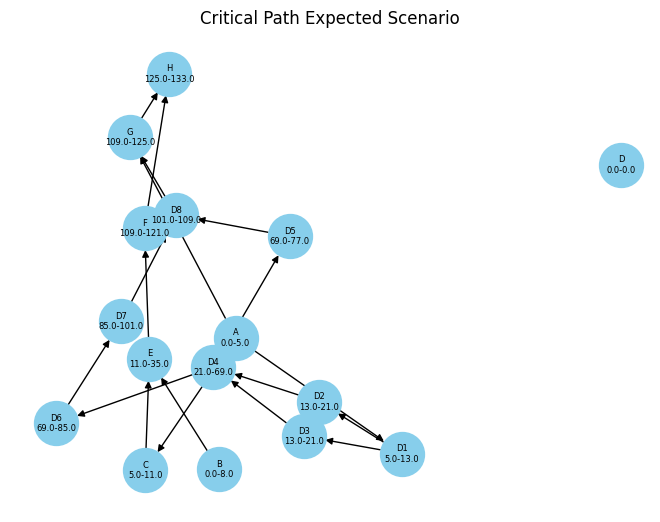

In [91]:
CPGraph = nx.DiGraph()

# Add nodes with start and end times as attributes
for activity in activities_list:
    CPGraph.add_node(activity, start=start_times_values[activity], end=end_times_values[activity])

# Add edges based on precedences
for activity, predecessors in precedences.items():
    for predecessor in predecessors:
        CPGraph.add_edge(predecessor, activity)

# Draw the graph
pos = nx.spring_layout(CPGraph)
nx.draw(CPGraph, pos, with_labels=False, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold')
node_labels = {node: f"{node}\n{start_times_values[node]}-{end_times_values[node]}" for node in CPGraph.nodes()}
plt.title('Critical Path Expected Scenario')
nx.draw_networkx_labels(CPGraph, pos, labels=node_labels, font_size=6)
plt.show()

Scenario 3: Worse Case Scenario

Critical Path time:
A starts at time 0
B starts at time 0
D starts at time 0
H ends at 152.95 days in duration
\Worse Case DataFrame:
    Variable   Value
0      end_A    5.75
1      end_B    9.20
2      end_C   12.65
3      end_D    0.00
4     end_D1   14.95
5     end_D2   24.15
6     end_D3   24.15
7     end_D4   79.35
8     end_D5   88.55
9     end_D6   97.75
10    end_D7  116.15
11    end_D8  125.35
12     end_E   40.25
13     end_F  139.15
14     end_G  143.75
15     end_H  152.95
16   start_A    0.00
17   start_B    0.00
18   start_C    5.75
19   start_D    0.00
20  start_D1    5.75
21  start_D2   14.95
22  start_D3   14.95
23  start_D4   24.15
24  start_D5   79.35
25  start_D6   79.35
26  start_D7   97.75
27  start_D8  116.15
28   start_E   12.65
29   start_F  125.35
30   start_G  125.35
31   start_H  143.75


C:\Users\hagraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pulp\pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


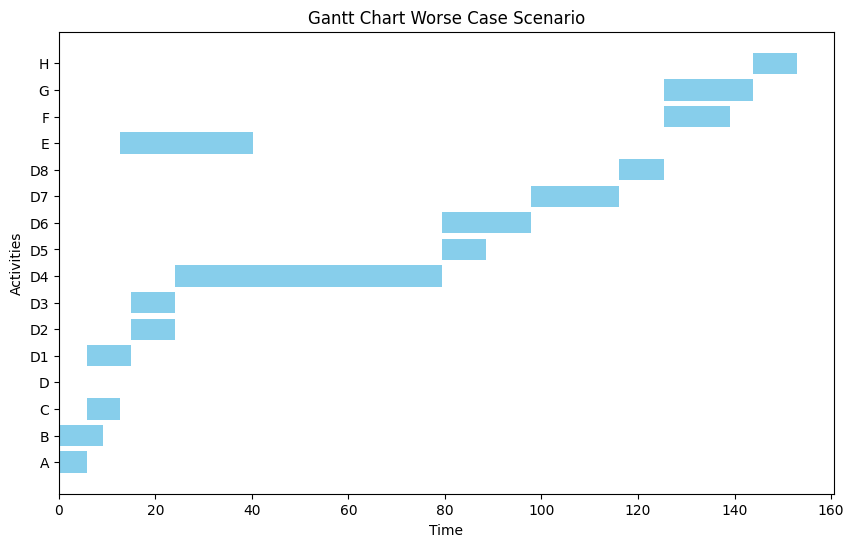

In [122]:
activities = activitiesWorst 
# Create a list of the activities
activities_list = list(activities.keys())

# Create the LP problem
prob = LpProblem("Critical Path", LpMinimize)

# Create the LP variables
start_times = {activity: LpVariable(f"start_{activity}", 0, None) for activity in activities_list}
end_times = {activity: LpVariable(f"end_{activity}", 0, None) for activity in activities_list}

# Add the constraints
for activity in activities_list:
    prob += end_times[activity] == start_times[activity] + activities[activity], f"{activity}_duration"
    for predecessor in precedences[activity]:
        prob += start_times[activity] >= end_times[predecessor], f"{activity}_predecessor_{predecessor}"

# Set the objective function
prob += lpSum([end_times[activity] for activity in activities_list]), "minimize_end_times"

# Solve the LP problem
status = prob.solve()

# Print the results
print("Critical Path time:")
for activity in activities_list:
    if value(start_times[activity]) == 0:
        print(f"{activity} starts at time 0")
    if value(end_times[activity]) == max([value(end_times[activity]) for activity in activities_list]):
        print(f"{activity} ends at {value(end_times[activity])} hours in duration")

# Create a list to store the variable names and their values
solution_data = []

# Print solution and populate the list
# print("\nSolution variable values:")
for var in prob.variables():
    if var.name != "_dummy":
        # print(var.name, "=", var.varValue)
        solution_data.append({'Variable': var.name, 'Value': var.varValue})

# Convert the list to a DataFrame
wworseCase_solution_df = pd.DataFrame(solution_data)

# Print the DataFrame
print("\Worse Case DataFrame:")
print(wworseCase_solution_df)

# Extract start and end times
start_times_values = {activity: value(start_times[activity]) for activity in activities_list}
end_times_values = {activity: value(end_times[activity]) for activity in activities_list}

# Calculate durations
durations = {activity: end_times_values[activity] - start_times_values[activity] for activity in activities_list}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, activity in enumerate(activities_list):
    ax.barh(activity, durations[activity], left=start_times_values[activity], color='skyblue')

ax.set_xlabel('Time')
ax.set_ylabel('Activities')
ax.set_title('Gantt Chart Worse Case Scenario')
plt.show()

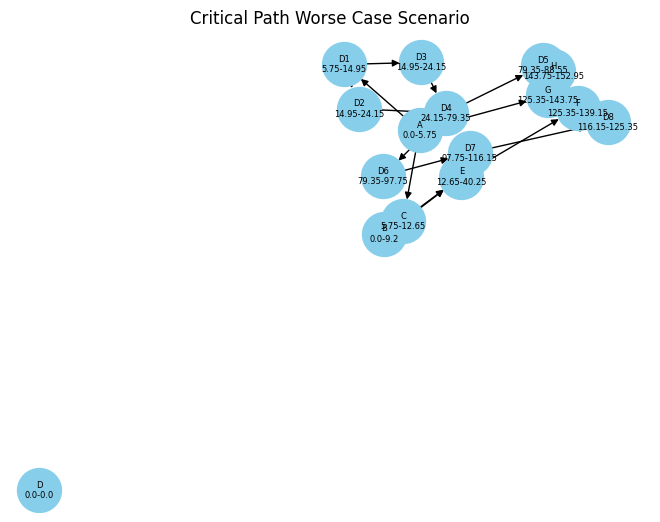

In [123]:
CPGraph = nx.DiGraph()

# Add nodes with start and end times as attributes
for activity in activities_list:
    CPGraph.add_node(activity, start=start_times_values[activity], end=end_times_values[activity])

# Add edges based on precedences
for activity, predecessors in precedences.items():
    for predecessor in predecessors:
        CPGraph.add_edge(predecessor, activity)

# Draw the graph
pos = nx.spring_layout(CPGraph)
nx.draw(CPGraph, pos, with_labels=False, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold')
node_labels = {node: f"{node}\n{start_times_values[node]}-{end_times_values[node]}" for node in CPGraph.nodes()}
plt.title('Critical Path Worse Case Scenario')
nx.draw_networkx_labels(CPGraph, pos, labels=node_labels, font_size=6)
plt.show()

In [124]:
# Merge the solution dataframes
merged_df = Best_case_solution_df.merge(activitiesExpected_solution_df, on='Variable', suffixes=('_Best', '_Expected'))
merged_df = merged_df.merge(wworseCase_solution_df, on='Variable')
merged_df.rename(columns={'Value': 'Value_Worst'}, inplace=True)

# Print the merged dataframe
print(merged_df)

    Variable  Value_Best  Value_Expected  Value_Worst
0      end_A        4.25             5.0         5.75
1      end_B        6.80             8.0         9.20
2      end_C        9.35            11.0        12.65
3      end_D        0.00             0.0         0.00
4     end_D1       11.05            13.0        14.95
5     end_D2       17.85            21.0        24.15
6     end_D3       17.85            21.0        24.15
7     end_D4       58.65            69.0        79.35
8     end_D5       65.45            77.0        88.55
9     end_D6       72.25            85.0        97.75
10    end_D7       85.85           101.0       116.15
11    end_D8       92.65           109.0       125.35
12     end_E       29.75            35.0        40.25
13     end_F      102.85           121.0       139.15
14     end_G      106.25           125.0       143.75
15     end_H      113.05           133.0       152.95
16   start_A        0.00             0.0         0.00
17   start_B        0.00    